# Data 620 Week6 Assignment 6
#### Raghunathan Ramnath, Dilip Ganesan and Ahmed Sajjad

In [26]:
import networkx as nx
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt


In [27]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']


In [28]:
women


['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [29]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

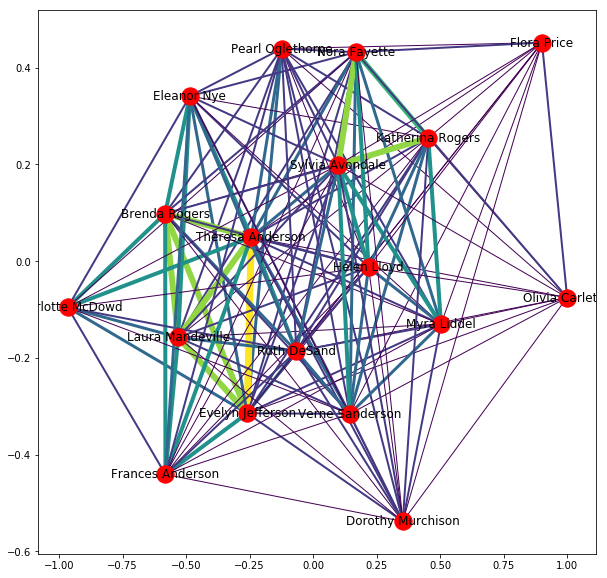

In [32]:
# Investigate the strength of the connections between the women
W = bi.weighted_projected_graph(G, women, ratio=False)
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.figure(figsize = (10,10))
nx.draw_networkx(W, width=weights, edge_color=weights)

In [63]:
# Degree of Women (number of edges adjacent each node)
def sort_x(x):
    sort = sorted(x.items(), key = lambda kv: (-kv[1], kv[0]) )
    return sort

w_degree = nx.degree(W)
w_degree = {k:round(v,1) for k, v in (w_degree)}
w_degree = sort_x(w_degree)
w_degree

[('Evelyn Jefferson', 17),
 ('Helen Lloyd', 17),
 ('Nora Fayette', 17),
 ('Ruth DeSand', 17),
 ('Sylvia Avondale', 17),
 ('Theresa Anderson', 17),
 ('Verne Sanderson', 17),
 ('Dorothy Murchison', 16),
 ('Katherina Rogers', 16),
 ('Myra Liddel', 16),
 ('Pearl Oglethorpe', 16),
 ('Brenda Rogers', 15),
 ('Eleanor Nye', 15),
 ('Frances Anderson', 15),
 ('Laura Mandeville', 15),
 ('Flora Price', 12),
 ('Olivia Carleton', 12),
 ('Charlotte McDowd', 11)]

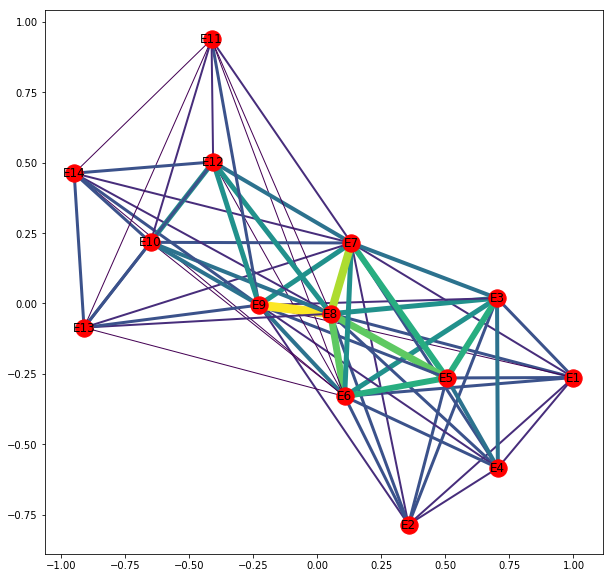

In [33]:
# Now we'll look at the clubs

G2 = nx.davis_southern_women_graph()
women = G2.graph['bottom']
clubs = G2.graph['top']
e = bi.weighted_projected_graph(G2, women, ratio=False)

# Investigate the strength of the connections between the clubs 
weights=[edata['weight'] for f,t,edata in e.edges(data=True)]
plt.figure(figsize=(10,10))
nx.draw_networkx(e, width=weights, edge_color=weights)

In [62]:
# Degree of clubs (number of edges adjacent each node)

e_degree = nx.degree(e)
e_degree = {k:round(v,1) for k, v in (e_degree)}
e_degree = sort_x(e_degree)
e_degree

[('E6', 13),
 ('E7', 13),
 ('E8', 13),
 ('E9', 13),
 ('E1', 8),
 ('E10', 8),
 ('E11', 8),
 ('E12', 8),
 ('E13', 8),
 ('E14', 8),
 ('E2', 8),
 ('E3', 8),
 ('E4', 8),
 ('E5', 8)]

As we can see from the above diagrams and the sort list, "E6,E7,E8 and E9" clubs have high degree.
7 of the women have high degree of 17. Network is centralized and closed.